In [1]:
import os  # Importing the os module for operating system interfaces
from operator import itemgetter  # Importing itemgetter for retrieving items by key or index
import numpy as np  # Importing numpy for numerical computations
import pandas as pd  # Importing pandas for data manipulation and analysis
import matplotlib.pyplot as plt  # Importing matplotlib for data visualization
import warnings  # Importing warnings to manage warning messages
warnings.filterwarnings('ignore')  # Ignoring warnings
get_ipython().magic(u'matplotlib inline')  # Enabling inline plotting
plt.style.use('ggplot')  # Setting plot style to ggplot

import tensorflow as tf  # Importing TensorFlow for deep learning

from keras import models, regularizers, layers, optimizers, losses, metrics  # Importing Keras components
from keras.models import Sequential  # Importing Sequential model from Keras
from keras.layers import Dense  # Importing Dense layer for neural networks
from keras.utils import to_categorical  # Importing utility for converting labels to one-hot encoding

**The IMDB dataset categorizes movie reviews with sentiment labels, indicating whether they are positive or negative.**

**During preprocessing, each review is transformed into a collection of word embeddings, where each word is represented by a fixed-length vector.**

In [2]:
from keras.layers import Embedding

# The Embedding layer requires a minimum of two inputs:
# The maximum word index plus one, or 1000, is the number of potential tokens.
# and the embeddings' dimensions, in this case 64.
emb_lay = Embedding(1000, 64)
from keras.datasets import imdb
from keras import preprocessing
from keras.utils import pad_sequences

**A custom-trained embedding layer with a training dataset of 100 samples**

In [3]:
# The number of words that should be considered as features
features = 10000
# Remove the text after this number of words(from the top max_features most common words)
length = 150

# Data loading to integers
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=features)

x_tr = x_train[:100]
y_tr = y_train[:100]

# The integer lists are now transformed into a 2D integer tensor with the shape of {(samples, maxlen)}.
x_train = pad_sequences(x_train, maxlen=length)
x_test = pad_sequences(x_test, maxlen=length)
from keras.models import Sequential
from keras.layers import Flatten, Dense

model1 = Sequential()
# In order to finally flatten the embedded inputs, the maximum length of the input to the Embedding layer is provided.
model1.add(Embedding(10000, 8, input_length=length))
# After the Embedding layer, our activations have shape `(samples, maxlen, 8)`.

# We flatten the 3D tensor of embeddings into a 2D tensor of shape
#`(samples, maxlen * 8)`
model1.add(Flatten())

# We add the classifier on top
model1.add(Dense(1, activation='sigmoid'))
model1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model1.summary()

hist1 = model1.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - acc: 0.6043 - loss: 0.6665 - val_acc: 0.8256 - val_loss: 0.4347
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - acc: 0.8585 - loss: 0.3665 - val_acc: 0.8462 - val_loss: 0.3478
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.8940 - loss: 0.2704 - val_acc: 0.8678 - val_loss: 0.3107
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.9112 - loss: 0.2283 - val_acc: 0.8604 - val_loss: 0.3155
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.9263 - loss: 0.1966 - val_acc: 0.8630 - val_loss: 0.3226
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.9383 - loss: 0.1703 - val_acc: 0.8616 - val_loss: 0.3180
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.9471 - loss: 0.1486 - val_acc: 0.8678 - val_loss: 0.3264
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - acc: 0.9540 - loss: 0.1314 - val_acc: 0.8674 - val_loss: 0.3280
Epoch 9/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - ac

**# Plotting training and validation accuracy/loss across**

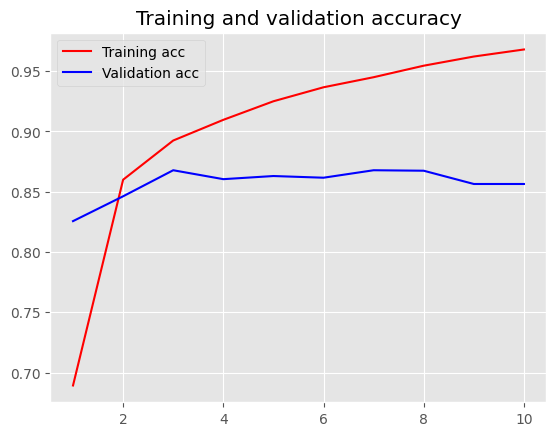

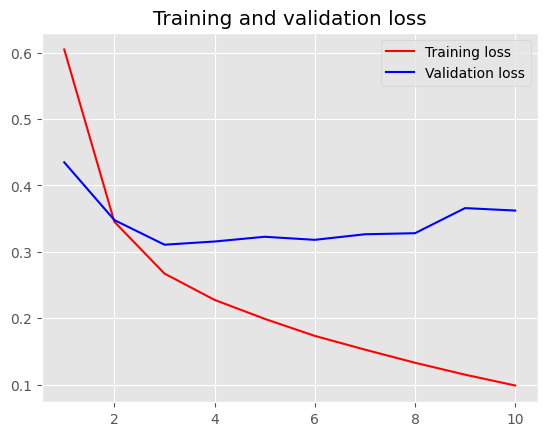

In [4]:
import matplotlib.pyplot as plt

# Train accuracy
accuracy = hist1.history["acc"]
# Validation accuracy
val_accuracy = hist1.history["val_acc"]
# Train loss
Train_loss = hist1.history["loss"]
# Validation loss
val_loss = hist1.history["val_loss"]


epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, "red", label = "Training acc")
plt.plot(epochs, val_accuracy, "b", label = "Validation acc")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, Train_loss, "red", label = "Training loss")
plt.plot(epochs, val_loss, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

**Evaluating the model on the test dataset and printing the test loss and accuracy**

In [5]:
test_loss, test_acc = model1.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8577 - loss: 0.3620
Test loss: 0.36292731761932373
Test accuracy: 0.8571599721908569


**A custom-trained embedding layer using a training dataset of 5,000 samples**

In [6]:
features=10000
length=150
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=features)

x_train = pad_sequences(x_train, maxlen=length)
x_test = pad_sequences(x_test, maxlen=length)

texts = np.concatenate((x_train, x_test), axis=0)
labels = np.concatenate((x_train, x_test), axis=0)

x_tr = x_train[:5000]
y_tr = y_train[:5000]

**Defining, compiling, and training a neural network model with an embedding layer, followed by a dense output layer**

In [7]:
model2 = Sequential()
model2.add(Embedding(10000, 8, input_length=length))
model2.add(Flatten())
model2.add(Dense(1, activation='sigmoid'))
model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model2.summary()
hist2 = model2.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - acc: 0.5901 - loss: 0.6649 - val_acc: 0.8270 - val_loss: 0.4246
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8467 - loss: 0.3666 - val_acc: 0.8560 - val_loss: 0.3351
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.8946 - loss: 0.2649 - val_acc: 0.8652 - val_loss: 0.3093
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9100 - loss: 0.2293 - val_acc: 0.8676 - val_loss: 0.3077
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9227 - loss: 0.1993 - val_acc: 0.8650 - val_loss: 0.3201
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.9352 - loss: 0.1792 - val_acc: 0.8722 - val_loss: 0.3090
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.9407 - loss: 0.1608 - val_acc: 0.8692 - val_loss: 0.3203
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.9498 - loss: 0.1427 - val_acc: 0.8584 - val_loss: 0.3570
Epoch 9/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - ac

**Plotting training and validation accuracy/loss over epochs for the second model's training history**

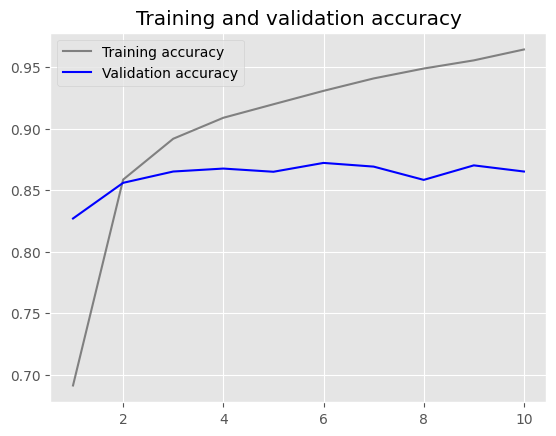

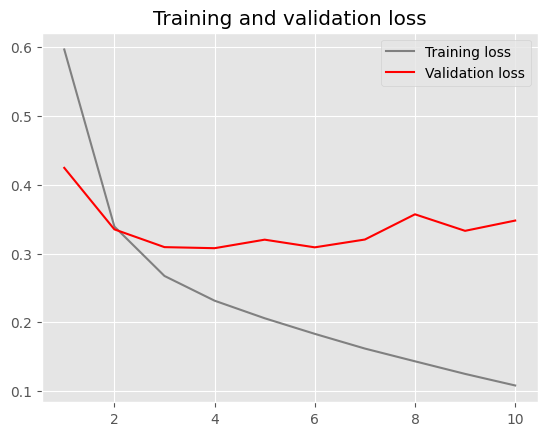

In [8]:
accuracy2 = hist2.history['acc']
val_accuracy2 = hist2.history['val_acc']
Train_loss2 = hist2.history['loss']
val_loss2 = hist2.history['val_loss']

epochs = range(1, len(accuracy2) + 1)

plt.plot(epochs, accuracy2, 'grey', label='Training accuracy')
plt.plot(epochs, val_accuracy2, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, Train_loss2, 'grey', label='Training loss')
plt.plot(epochs, val_loss2, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**Evaluating the second model on the test dataset and printing the test loss and accuracy**

In [9]:
test_loss2, test_accuracy2 = model2.evaluate(x_test, y_test)
print('Test loss:', test_loss2)
print('Test accuracy:', test_accuracy2)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.8647 - loss: 0.3526
Test loss: 0.3515072166919708
Test accuracy: 0.8629599809646606


**A custom-trained embedding layer using a training dataset of 1,000 samples**

In [10]:
features=10000
length=150
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=features)

x_train = pad_sequences(x_train, maxlen=length)
x_test = pad_sequences(x_test, maxlen=length)

texts = np.concatenate((x_train, x_test), axis=0)
labels = np.concatenate((x_train, x_test), axis=0)

x_tr = x_train[:1000]
y_tr = y_train[:1000]

**Defining, compiling, and training a neural network model with an embedding layer, followed by a dense output layer for binary classification**

In [11]:
model3 = Sequential()
model3.add(Embedding(10000, 8, input_length=length))
model3.add(Flatten())
model3.add(Dense(1, activation='sigmoid'))
model3.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model3.summary()
hist3 = model3.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - acc: 0.5999 - loss: 0.6639 - val_acc: 0.8282 - val_loss: 0.4262
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8540 - loss: 0.3691 - val_acc: 0.8582 - val_loss: 0.3286
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.8889 - loss: 0.2757 - val_acc: 0.8656 - val_loss: 0.3162
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9058 - loss: 0.2335 - val_acc: 0.8686 - val_loss: 0.3044
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.9230 - loss: 0.2023 - val_acc: 0.8584 - val_loss: 0.3390
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.9355 - loss: 0.1760 - val_acc: 0.8712 - val_loss: 0.3105
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9464 - loss: 0.1518 - val_acc: 0.8700 - val_loss: 0.3179
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.9570 - loss: 0.1285 - val_acc: 0.8670 - val_loss: 0.3321
Epoch 9/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - ac

**# Plotting the training and validation accuracy/loss over epochs for the third model's training history**

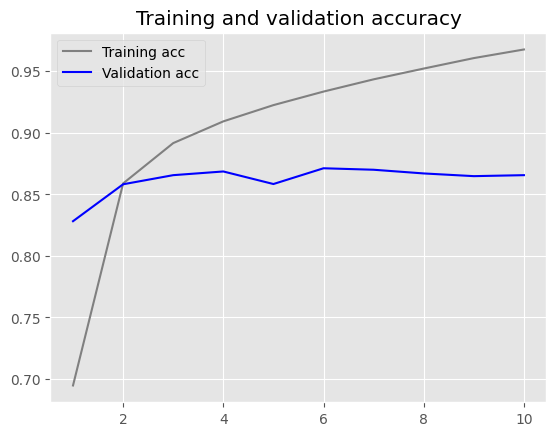

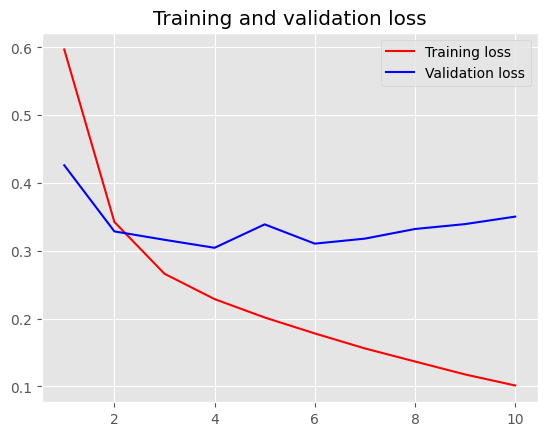

In [12]:
accuracy3 = hist3.history["acc"]
val_accuracy3 = hist3.history["val_acc"]
Train_loss3 = hist3.history["loss"]
val_loss3 = hist3.history["val_loss"]

epochs = range(1, len(accuracy3) + 1)

plt.plot(epochs, accuracy3, "grey", label = "Training acc")
plt.plot(epochs, val_accuracy3, "b", label = "Validation acc")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, Train_loss3, "red", label = "Training loss")
plt.plot(epochs, val_loss3, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

**Evaluating the second model on the test dataset and printing the test loss and accuracy**

In [13]:
test_loss3, test_accuracy3 = model3.evaluate(x_test, y_test)
print('Test loss:', test_loss3)
print('Test accuracy:', test_accuracy3)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8658 - loss: 0.3504
Test loss: 0.34866148233413696
Test accuracy: 0.864080011844635


**Custom-trained embedding layer with training sample size = 10000**

In [14]:
features=10000
length=150
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=features)

x_train = pad_sequences(x_train, maxlen=length)
x_test = pad_sequences(x_test, maxlen=length)

texts = np.concatenate((x_train, x_test), axis=0)
labels = np.concatenate((x_train, x_test), axis=0)

x_tr = x_train[:10000]
y_tr = y_train[:10000]

**# Defining, compiling, and training a neural network model with an embedding layer and a dense output layer for binary classificatio**

In [15]:
model4 = Sequential()
model4.add(Embedding(10000, 8, input_length=length))
model4.add(Flatten())
model4.add(Dense(1, activation='sigmoid'))
model4.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model4.summary()
hist4 = model4.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - acc: 0.6049 - loss: 0.6575 - val_acc: 0.8318 - val_loss: 0.4079
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8599 - loss: 0.3482 - val_acc: 0.8644 - val_loss: 0.3229
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.8966 - loss: 0.2669 - val_acc: 0.8634 - val_loss: 0.3115
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.9073 - loss: 0.2321 - val_acc: 0.8668 - val_loss: 0.3097
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.9211 - loss: 0.2059 - val_acc: 0.8714 - val_loss: 0.3061
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.9348 - loss: 0.1804 - val_acc: 0.8700 - val_loss: 0.3060
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9390 - loss: 0.1667 - val_acc: 0.8692 - val_loss: 0.3170
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.9482 - loss: 0.1473 - val_acc: 0.8652 - val_loss: 0.3334
Epoch 9/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - ac

**Plotting training and validation accuracy/loss over epochs for the fourth model's training history**

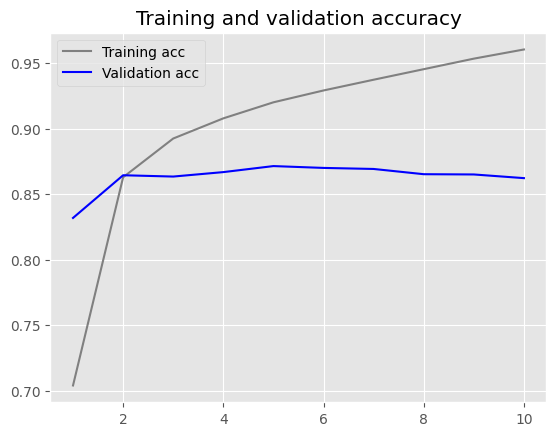

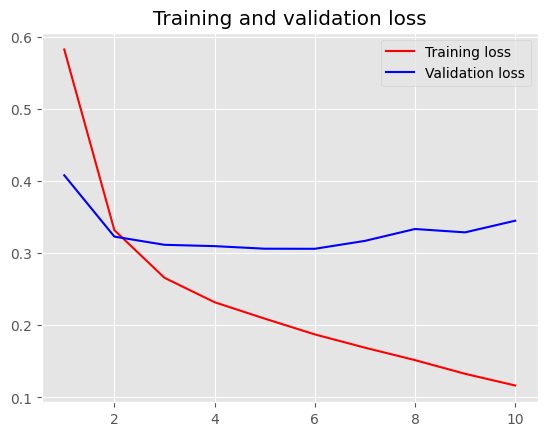

In [16]:
accuracy4 = hist4.history["acc"]
val_accuracy4 = hist4.history["val_acc"]
Train_loss4 = hist4.history["loss"]
val_loss4 = hist4.history["val_loss"]

epochs = range(1, len(accuracy4) + 1)

plt.plot(epochs, accuracy4, "grey", label = "Training acc")
plt.plot(epochs, val_accuracy4, "b", label = "Validation acc")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, Train_loss4, "red", label = "Training loss")
plt.plot(epochs, val_loss4, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

**Evaluating the second model on the test dataset and printing the test loss and accuracy**

In [17]:
test_loss4, test_accuracy4 = model4.evaluate(x_test, y_test)
print('Test loss:', test_loss4)
print('Test accuracy:', test_accuracy4)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.8618 - loss: 0.3498
Test loss: 0.3469642698764801
Test accuracy: 0.8638799786567688


**Downloading the IMDB dataset, extracting it, and removing the unsupervised training data**

In [18]:
!curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xf aclImdb_v1.tar.gz
!rm -r aclImdb/train/unsup

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  2213k      0  0:00:37  0:00:37 --:--:-- 2249k


**Loading IMDB movie reviews and assigning sentiment labels (0 for negative, 1 for positive) from the training dataset**

In [19]:
import os
import shutil

imdb = 'aclImdb'
training = os.path.join(imdb, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(training, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding='utf-8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

**Utilizing Pretrained Word Embeddings: When training data is insufficient to learn word embeddings alongside the desired solution, use pretrained embeddings.**

**Tokenizing the data.**

In [20]:
#from keras.preprocessing.text import Tokenizer # The 'keras.preprocessing.text' module is no longer available.
from tensorflow.keras.preprocessing.text import Tokenizer  # Import Tokenizer from 'tensorflow.keras.preprocessing.text'.
from tensorflow.keras.utils import pad_sequences # Import pad_sequences from 'tensorflow.keras.utils'.
import numpy as np

length2 = 150 # cut off review after 150 words
train_data = 100 # Training sample 100
val_data = 10000 # Validation sample 10000
words = 10000 # Considers only the top 10000 words in the dataset

tokenizer1 = Tokenizer(num_words=words)
tokenizer1.fit_on_texts(texts)
sequences = tokenizer1.texts_to_sequences(texts)
word_index = tokenizer1.word_index
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=length2)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)
# Splits data into training and validation set, but shuffles is, since samples are ordered:
# all negatives first, then all positive
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_tr = data[:train_data] # (200, 100)
y_tr = labels[:train_data] # shape (200,)
x_val = data[train_data:train_data+val_data] # shape (10000, 100)
y_val = labels[train_data:train_data+val_data] # shape (10000,)

Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


GloVe word embedding installation and set up

In [21]:
import numpy as np
import requests
from io import BytesIO
import zipfile

glove_url = 'https://nlp.stanford.edu/data/glove.6B.zip'  # URL to download GloVe embeddings
glove_zip = requests.get(glove_url)

# Unzip the contents
with zipfile.ZipFile(BytesIO(glove_zip.content)) as z:
    z.extractall('/content/glove')

# Loading GloVe embeddings into memory
emb_index = {}
with open('/content/glove/glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        emb_index[word] = coefs

print("Found %s word vectors." % len(emb_index))

Found 400000 word vectors.


**We trained the 6B version of the GloVe model using data from Gigaword 5 and Wikipedia, resulting in 400,000 words and 6 billion tokens**

**Preparing the matrix of GloVe word embeddings.**


**pretrained word embedding layer with training sample size = 100**

In [22]:
emb_di = 100

emb_matrix = np.zeros((words, emb_di))
for word, i in word_index.items():
    emb_vector = emb_index.get(word)
    if i < words:
        if emb_vector is not None:
            # Words not found in embedding index will be all-zeros.
            emb_matrix[i] = emb_vector

**# Building a sequential neural network with a trainable embedding layer, flattening, and dense layers for binary classification**

In [23]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(words, emb_di, input_length=length2))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

**Building a neural network with a pre-trained, non-trainable embedding layer, followed by dense layers for binary classification**

In [24]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
# Set trainable=False initially to use pre-trained embeddings
model.add(Embedding(words, emb_di, input_length=length2, trainable=False, weights=[emb_matrix]))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

# You don't need this anymore since you set weights and trainable in the Embedding layer definition
# model.layers[0].set_weights([emb_matrix])
# model.layers[0].trainable = False

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)              │ ?                           │       1,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,000,000 (3.81 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,000,000 (3.81 MB)

**The Embedding layer uses pre-trained word embeddings. Setting `trainable` to `False` before initializing the Embedding layer ensures that these embeddings remain unchanged during training. If `trainable` is set to `True`, the optimization process can update the word embedding values. To prevent pre-trained embeddings from losing their existing knowledge, it is advisable not to update them while the rest of the model is still being trained.**

In [25]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
hist = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.weights.h5') # Changed the filename to include '.weights.h5'

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - acc: 0.5026 - loss: 0.7708 - val_acc: 0.5034 - val_loss: 0.6931
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.4949 - loss: 0.6940 - val_acc: 0.4969 - val_loss: 0.6932
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.4971 - loss: 0.6933 - val_acc: 0.4953 - val_loss: 0.6934
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.5028 - loss: 0.6935 - val_acc: 0.5042 - val_loss: 0.6931
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.5068 - loss: 0.6958 - val_acc: 0.4974 - val_loss: 0.6934
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.5226 - loss: 0.6906 - val_acc: 0.5212 - val_loss: 0.6959
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.5964 - loss: 0.6651 - val_acc: 0.5213 - val_loss: 0.7136
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.6681 - loss: 0.6159 - val_acc: 0.4943 - val_loss: 0.7394
Epoch 9/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - ac

**As expected with the limited training data, the model overfits rapidly. The significant fluctuations in validation accuracy are also a result of this.**

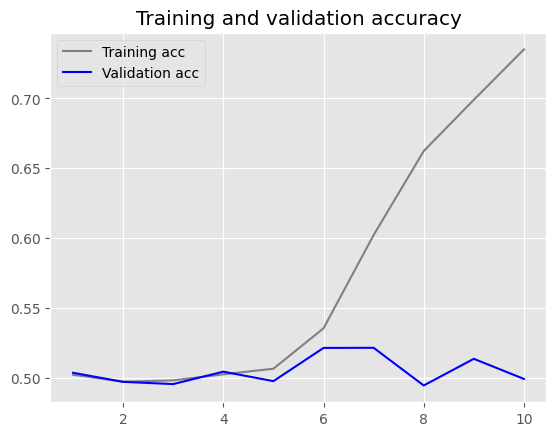

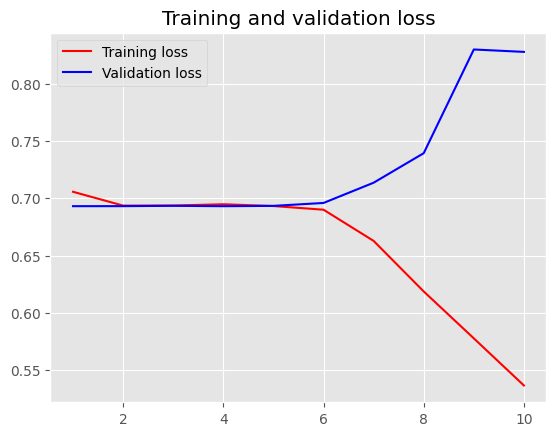

In [26]:
import matplotlib.pyplot as plt

accuracy = hist.history['acc']
val_accuracy = hist.history['val_acc']
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'grey', label='Training acc')
plt.plot(epochs, val_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, train_loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**Evaluating the second model on the test dataset and printing the test loss and accuracy**

In [27]:
test_loss, test_accuracy= model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.5661 - loss: 0.7288
Test loss: 0.732215166091919
Test accuracy: 0.5650799870491028


**Pretrained word embedding layer with training sample size = 5000**

In [28]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
import numpy as np

length2 = 150
train_data = 5000 # Training sample is 5000
val_data = 10000
words = 10000

tokenizer2 = Tokenizer(num_words=words)
tokenizer2.fit_on_texts(texts)
sequences = tokenizer2.texts_to_sequences(texts)
word_index = tokenizer2.word_index
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=length2)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_tr = data[:train_data]
y_tr = labels[:train_data]
x_validation = data[train_data:train_data+val_data]
y_validation = labels[train_data:train_data+val_data]
emb_di = 100

emb_matrix = np.zeros((words, emb_di))
for word, i in word_index.items():
    emb_vector = emb_index.get(word)
    if i < words:
        if emb_vector is not None:

            emb_matrix[i] = emb_vector

Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


**# Defining, training, and evaluating a neural network with a pre-trained embedding layer using GloVe, and plotting training/validation accuracy and loss**

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - acc: 0.4931 - loss: 0.7761 - val_acc: 0.4978 - val_loss: 0.6931
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.4913 - loss: 0.6948 - val_acc: 0.4983 - val_loss: 0.8211
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.5002 - loss: 0.6961 - val_acc: 0.5033 - val_loss: 0.6931
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.4941 - loss: 0.6927 - val_acc: 0.4996 - val_loss: 0.7012
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.5210 - loss: 0.6870 - val_acc: 0.5011 - val_loss: 0.6969
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.5708 - loss: 0.6707 - val_acc: 0.4973 - val_loss: 0.7330
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.6523 - loss: 0.6226 - val_acc: 0.4988 - val_loss: 0.7762
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.7113 - loss: 0.5606 - val_acc: 0.5014 - val_loss: 0.7715
Epoch 9/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - ac

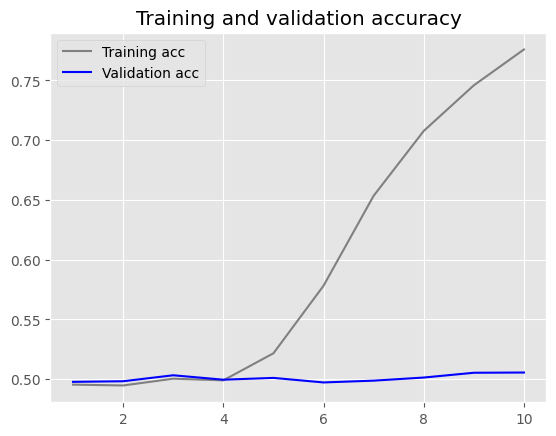

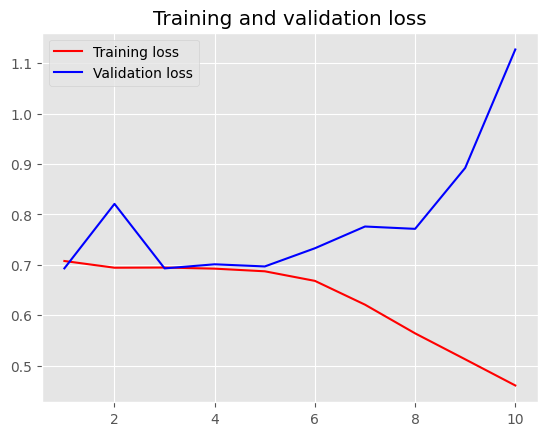

In [29]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
import numpy as np

model11 = Sequential()
model11.add(Embedding(words, emb_di, input_length=length2))
model11.add(Flatten())
model11.add(Dense(32, activation='relu'))
model11.add(Dense(1, activation='sigmoid'))
model11.summary()

# Build the Embedding layer before setting weights
model11.layers[0].build((None,))  # (None,) represents the input shape

# Now you can set the weights
model11.layers[0].set_weights([emb_matrix])
model11.layers[0].trainable = False
model11.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
hist11 = model11.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_validation, y_validation))
model11.save_weights('pre_trained_glove_model.weights.h5') # Change the filename to end with .weights.h5
import matplotlib.pyplot as plt

accuracy11 = hist11.history['acc']
val_acc11 = hist11.history['val_acc']
train_loss11 = hist11.history['loss']
val_loss11 = hist11.history['val_loss']

epochs = range(1, len(accuracy11) + 1)

plt.plot(epochs, accuracy11, 'grey', label='Training acc')
plt.plot(epochs, val_acc11, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, train_loss11, 'red', label='Training loss')
plt.plot(epochs, val_loss11, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**Evaluating the second model on the test dataset and printing the test loss and accuracy**

In [30]:
test_loss11, test_accuracy11 = model11.evaluate(x_test, y_test)
print('Test loss:', test_loss11)
print('Test accuracy:', test_accuracy11)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.5726 - loss: 0.9125
Test loss: 0.9146118760108948
Test accuracy: 0.5672799944877625


**Pretrained word embedding layer with training sample size = 1000**

Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)              │ ?                           │       1,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,000,000 (3.81 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,000,000 (3.81 MB)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - acc: 0.4946 - loss: 0.7621 - val_acc: 0.4954 - val_loss: 0.6932
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.5082 - loss: 0.6936 - val_acc: 0.5027 - val_loss: 0.6964
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.5142 - loss: 0.6912 - val_acc: 0.4976 - val_loss: 0.7051
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.5423 - loss: 0.6827 - val_acc: 0.4952 - val_loss: 0.9757
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.5925 - loss: 0.6594 - val_acc: 0.4993 - val_loss: 0.7407
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.6397 - loss: 0.6214 - val_acc: 0.4995 - val_loss: 0.7811
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.6771 - loss: 0.5839 - val_acc: 0.5008 - val_loss: 0.8869
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - acc: 0.7106 - loss: 0.5452 - val_acc: 0.4979 - val_loss: 0.8212
Epoch 9/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - ac

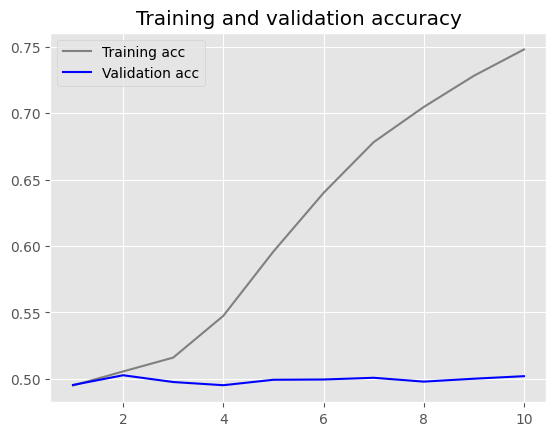

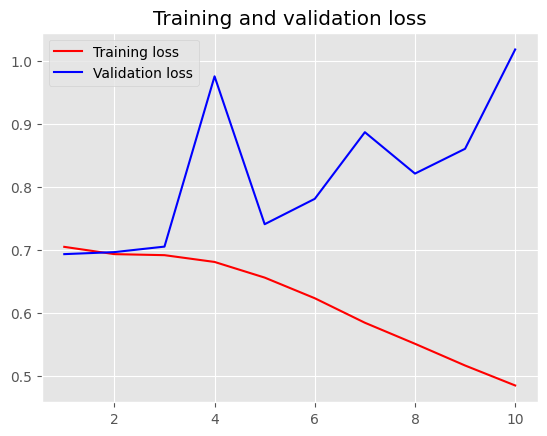

In [31]:
from tensorflow.keras.preprocessing.text import Tokenizer # Use tensorflow.keras instead of keras
from tensorflow.keras.utils import pad_sequences # Use tensorflow.keras instead of keras
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense


length = 150
train_data = 1000 #Trains on 1000 samples
val_data = 10000
words = 10000

tokenizer3 = Tokenizer(num_words=words)
tokenizer3.fit_on_texts(texts)
sequences = tokenizer3.texts_to_sequences(texts)
word_index = tokenizer3.word_index
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=length)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_tr = data[:train_data]
y_tr = labels[:train_data]
x_val = data[train_data:train_data+val_data]
y_val = labels[train_data:train_data+val_data]
emb_dim = 100

emb_matrix = np.zeros((words, emb_dim))
for word, i in word_index.items():
    emb_vector = emb_index.get(word)
    if i < words:
        if emb_vector is not None:

            emb_matrix[i] = emb_vector


model12 = Sequential()
# Pass the pre-trained weights directly to the Embedding layer during initialization
model12.add(Embedding(words, emb_dim, input_length=length, weights=[emb_matrix], trainable=False))
model12.add(Flatten())
model12.add(Dense(32, activation='relu'))
model12.add(Dense(1, activation='sigmoid'))
model12.summary()

# Removed the line: model12.layers[0].set_weights([emb_matrix])
# Removed the line: model12.layers[0].trainable = False
model12.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
hist12 = model12.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model12.save_weights('pre_trained_glove_model.weights.h5')
import matplotlib.pyplot as plt

acc12 = hist12.history['acc']
val_acc12 = hist12.history['val_acc']
loss12 = hist12.history['loss']
val_loss12 = hist12.history['val_loss']

epochs = range(1, len(acc12) + 1)

plt.plot(epochs, acc12, 'grey', label='Training acc')
plt.plot(epochs, val_acc12, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss12, 'red', label='Training loss')
plt.plot(epochs, val_loss12, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**Evaluating the second model on the test dataset and printing the test loss and accuracy**

In [32]:
test_loss12, test_accuracy12 = model12.evaluate(x_test, y_test)
print('Test loss:', test_loss12)
print('Test accuracy:', test_accuracy12)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.5744 - loss: 0.9067
Test loss: 0.8979401588439941
Test accuracy: 0.5701599717140198


**Pretrained word embedding layer with training sample size = 10000**

Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - acc: 0.7131 - loss: 0.5297 - val_acc: 0.4994 - val_loss: 0.9748
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.9403 - loss: 0.1631 - val_acc: 0.4975 - val_loss: 1.3667
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.9937 - loss: 0.0243 - val_acc: 0.4998 - val_loss: 2.1974
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - acc: 0.9994 - loss: 0.0029 - val_acc: 0.4997 - val_loss: 2.7114
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - acc: 0.9998 - loss: 6.4601e-04 - val_acc: 0.5029 - val_loss: 3.1315
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 1.0000 - loss: 1.0651e-04 - val_acc: 0.5005 - val_loss: 3.2489
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 1.0000 - loss: 4.7905e-05 - val_acc: 0.5028 - val_loss: 3.3999
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 1.0000 - loss: 4.1177e-05 - val_acc: 0.5042 - val_loss: 3.3977
Epoch 9/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 

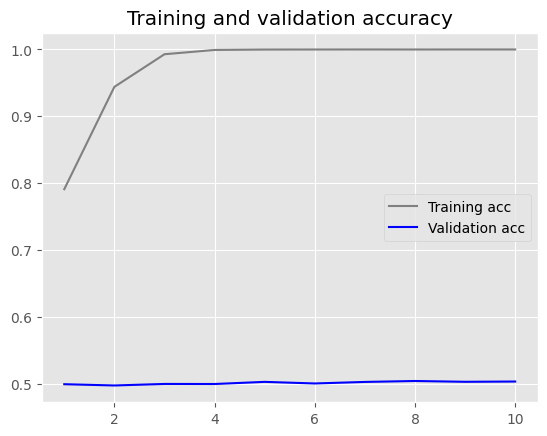

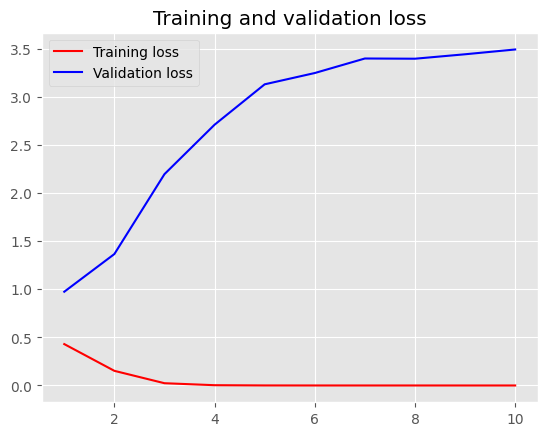

In [33]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
import numpy as np

length = 150
train_ds = 10000 # Trains on 10000 samples
valid_ds = 10000
words = 10000

tokenizer4 = Tokenizer(num_words=words)
tokenizer4.fit_on_texts(texts)
sequences = tokenizer4.texts_to_sequences(texts)
word_index = tokenizer4.word_index
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=length)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_tr = data[:train_ds]
y_tr = labels[:train_ds]
x_val = data[train_ds:train_ds+valid_ds]
y_val = labels[train_ds:train_ds+valid_ds]
emb_dim = 100

emb_matrix = np.zeros((words, emb_dim))
for word, i in word_index.items():
    emb_vector = emb_index.get(word)
    if i < words:
        if emb_vector is not None:

            emb_matrix[i] = emb_vector

from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
model13 = Sequential()
model13.add(Embedding(words, emb_dim, input_length=length))
model13.add(Flatten())
model13.add(Dense(32, activation='relu'))
model13.add(Dense(1, activation='sigmoid'))
model13.summary()

model13.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
hist13 = model13.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model13.save_weights('pre_trained_glove_model.weights.h5') # Changed the file name to end with .weights.h5
import matplotlib.pyplot as plt

accuracy13 = hist13.history['acc']
val_acc13 = hist13.history['val_acc']
loss13 = hist13.history['loss']
val_loss13 = hist13.history['val_loss']

epochs = range(1, len(accuracy13) + 1)

plt.plot(epochs, accuracy13, 'grey', label='Training acc')
plt.plot(epochs, val_acc13, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss13, 'red', label='Training loss')
plt.plot(epochs, val_loss13, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**Evaluating the second model on the test dataset and printing the test loss and accuracy**

In [34]:
test_loss13, test_accuracy13 = model13.evaluate(x_test, y_test)
print('Test loss:', test_loss13)
print('Test accuracy:', test_accuracy13)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8273 - loss: 0.9563
Test loss: 0.9551675915718079
Test accuracy: 0.8309199810028076
